1cm / 10도씩 이동
5 -> 1cm
10 -> 2cm
90 -> 18cm
360 -> 72cm

In [1]:
import os
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [2]:
log_dir = 'logs/study2'
lognames = [l for l in os.listdir(log_dir) if l!='.DS_Store']

In [3]:
lognames

['GunminLee', 'wooseok', 'jeongho', 'hogun', 'jaeyeon', 'MineuiHong']

In [290]:
lognames = [lg for lg in lognames if lg != 'jaeyeon']

In [291]:
lognames

['GunminLee', 'wooseok', 'jeongho', 'MineuiHong']

In [4]:
colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [128, 128, 0], [128, 0, 128], [128, 128, 0], [0, 255, 128]])/255
# colors = np.array([[0, 0, 0], [255, 0, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255], [0, 255, 0], [255, 0, 255],                                                               
#                     [128, 255, 0], [255, 0, 128], [255, 128, 0], [0, 255, 128]])/255
transforms = {
                'SF': [],
                'SD': [],
                'Binary': [],
                'Linear': [],
                'Score': []
            }
counts = {
            'SF': [],
            'SD': [],
            'Binary': [],
            'Linear': [],
            'Score': []
        }
nasatlxs = {
            'SF': [],
            'SD': [],
            'Binary': [],
            'Linear': [],
            'Score': []
        }
scores = []
marker_colors = []
names = []


# Load and normalize NASA-TLX
nasa_tlx_preprocessed = {}
for logname in lognames:
    log_path = os.path.join(log_dir, logname)
    with open(os.path.join(log_path, 'nasa_tlx.txt'), 'r') as f2:
        nasa_tlx = f2.readlines()
    tlx_scores = []
    for idx in range(len(nasa_tlx)):
        tlx_score = eval('['+nasa_tlx[idx].replace('\n', '').replace(' ', ',')+']')
        tlx_scores.append(tlx_score)
    tlx_scores_norm = (tlx_scores - np.min(tlx_scores, 0)) / (np.max(tlx_scores, 0) - np.min(tlx_scores, 0)) * 100
    nasa_tlx_preprocessed[logname] = tlx_scores_norm
    #nasa_tlx_preprocessed[logname] = np.array(tlx_scores)*20

# Load and process logs
for li, logname in enumerate(lognames):
    color = colors[li]
    log_path = os.path.join(log_dir, logname)
    log_file = [f for f in os.listdir(log_path) if f.startswith('log_')][0]
    with open(os.path.join(log_path, log_file), 'r') as f:
        lines = f.readlines()[1:]
      
    nasa_tlx = nasa_tlx_preprocessed[logname]
    #with open(os.path.join(log_path, 'nasa_tlx.txt'), 'r') as f2:
    #    nasa_tlx = f2.readlines()
        
    for idx, line in enumerate(lines):
        scene_name, transform, count = line.replace(' ', '').split('/')
        scene_name = scene_name.split(':')[1]
        transform = eval(transform)
        count = int(count[:-1])
        
        keys = ['SF', 'SD', 'Binary', 'Linear', 'Score']
        for key in keys:
            if scene_name.startswith(key):
                transforms[key].append(transform)
                counts[key].append(count)
                #tlx_score = eval('['+nasa_tlx[idx].replace('\n', '').replace(' ', ',')+']')
                nasatlxs[key].append(nasa_tlx[idx])
                #nasatlxs[key].append(tlx_score)
                if key=='Score':
                    score = int(scene_name.split('_')[-1].split('.png')[0][1:]) / 1000
                    scores.append(score)
                    marker_colors.append(color)
                    names.append(logname)

In [5]:
def calculate_transforms(transforms):
    xs, ys, rots = [], [], []
    for ti in range(len(transforms)):
        transform = transforms[ti]
        cumulative_x = 0
        cumulative_y = 0
        cumulative_rot = 0
        for trans in transform:
            delta_x = np.abs(trans[0][0])
            delta_y = np.abs(trans[0][1])
            delta_rot = np.min([np.abs(trans[1]), 360-np.abs(trans[1])])
            cumulative_x += delta_x
            cumulative_y += delta_y
            cumulative_rot += delta_rot
        xs.append(cumulative_x)
        ys.append(cumulative_y)
        rots.append(cumulative_rot)
    return xs, ys, rots

In [6]:
print("Normalized Version")
keys = ['SF', 'SD', 'Binary', 'Linear', 'Score']
print('        distance\trotation\tcounts\t\tNASA-TLX')
for key in keys[:-1]:
    xs, ys, rots = calculate_transforms(transforms[key])
    cts = counts[key]
    nasatlx = nasatlxs[key]
    print('%s\t%.1f\t\t%.1f\t\t%.1f\t\t%.2f'%(key, (np.mean(xs)+np.mean(ys))/5, np.mean(rots), np.mean(cts), np.mean(nasatlx)))
    print('\t+-%.1f\t\t+-%.1f\t\t+-%.1f\t\t+-%.2f'%(np.std((np.array(xs)+np.array(ys))/5), np.std(rots), np.std(cts), np.std(nasatlx)))

Normalized Version
        distance	rotation	counts		NASA-TLX
SF	103.8		130.0		139.6		48.70
	+-37.3		+-132.0		+-60.0		+-28.28
SD	62.7		79.6		86.8		51.00
	+-27.0		+-75.2		+-33.8		+-30.92
Binary	49.4		160.0		76.2		24.51
	+-36.6		+-106.7		+-49.9		+-24.36
Linear	45.2		112.5		66.7		22.75
	+-31.5		+-132.0		+-46.1		+-23.59


In [294]:
for i in range(len(lognames)):
    print(lognames[i])
#     plt.figure(figsize=(1,1))
#     plt.imshow(np.ones([10, 10, 3])*colors[i])
#     plt.show()

GunminLee
wooseok
jeongho
MineuiHong


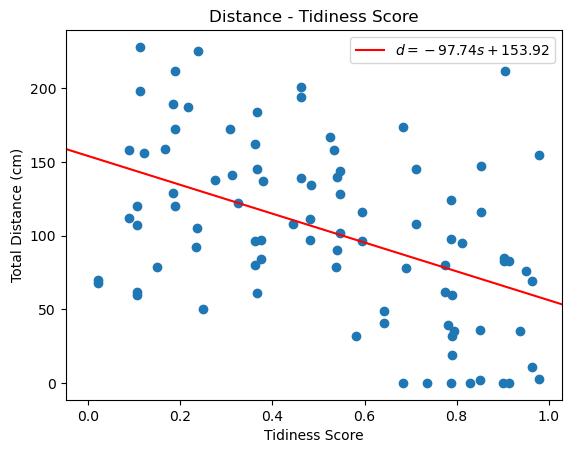

PearsonRResult(statistic=-0.4746039518432762, pvalue=2.2908349010505247e-06)


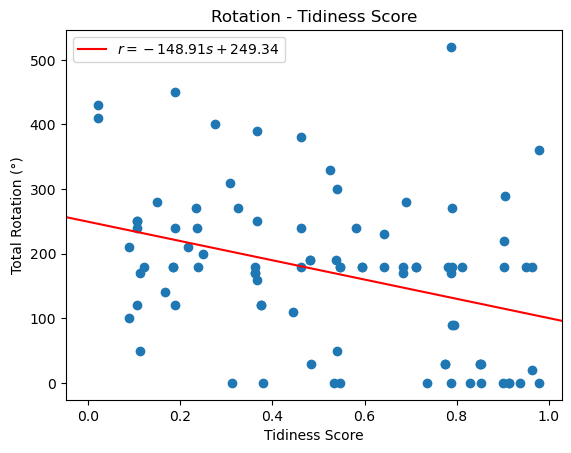

PearsonRResult(statistic=-0.35790039456680284, pvalue=0.0005334941971305513)


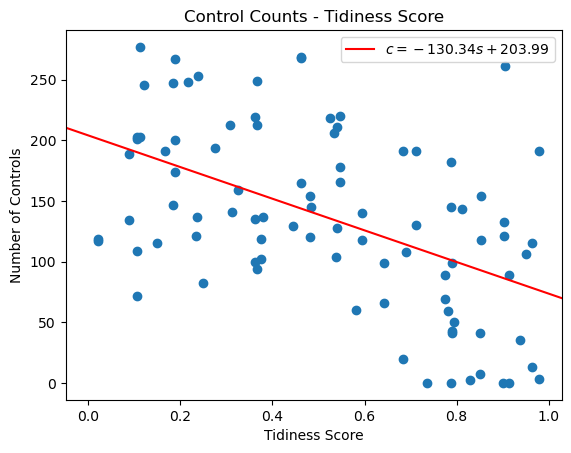

PearsonRResult(statistic=-0.5079548201333058, pvalue=3.2137625677613984e-07)


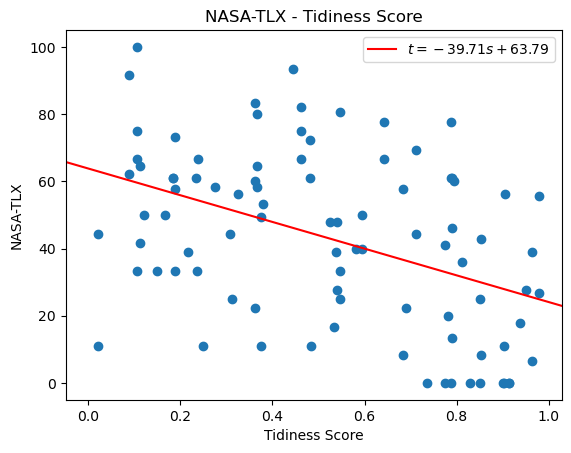

PearsonRResult(statistic=-0.4386952834384934, pvalue=1.5252228988349811e-05)


In [7]:
xs, ys, rots = calculate_transforms(transforms['Score'])
cts = counts['Score']

distances = (np.array(xs)+np.array(ys))/5  # cm
m, b = np.polyfit(scores, distances, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$d = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, distances)
plt.legend()
plt.title('Distance - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('Total Distance (cm)')
plt.show()
print(scipy.stats.pearsonr(scores, distances))

m, b = np.polyfit(scores, rots, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$r = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, rots)
plt.legend()
plt.title('Rotation - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('Total Rotation (°)')
plt.show()
print(scipy.stats.pearsonr(scores, rots))

m, b = np.polyfit(scores, cts, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$c = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, cts)
plt.legend()
plt.title('Control Counts - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('Number of Controls')
plt.show()
print(scipy.stats.pearsonr(scores, cts))


m, b = np.polyfit(scores, np.mean(nasatlxs['Score'], 1), deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$t = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, np.mean(nasatlxs['Score'], 1))
plt.legend()
plt.title('NASA-TLX - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('NASA-TLX')
plt.show()
print(scipy.stats.pearsonr(scores, np.mean(nasatlxs['Score'], 1)))


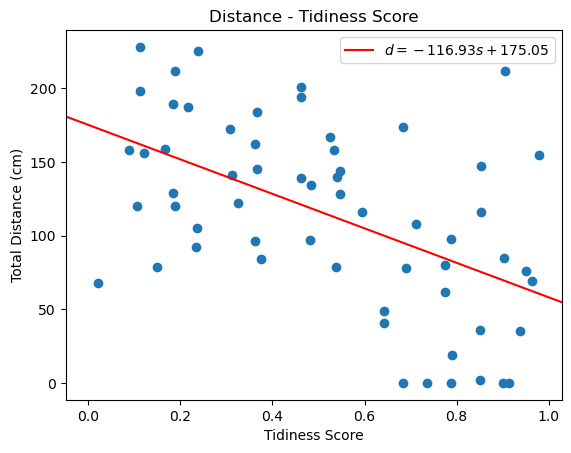

PearsonRResult(statistic=-0.527711135680401, pvalue=1.4725317010318717e-05)


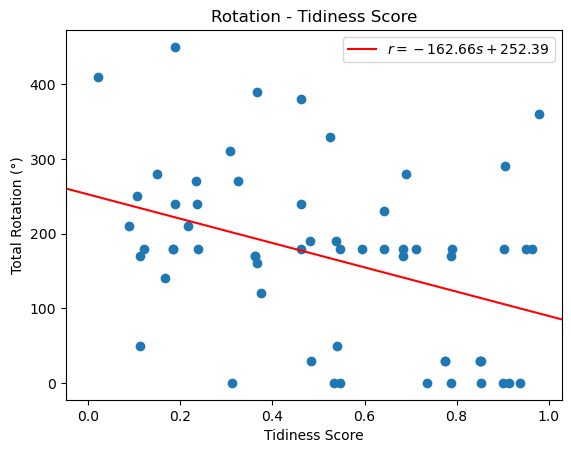

PearsonRResult(statistic=-0.39462368464768816, pvalue=0.001807739649626299)


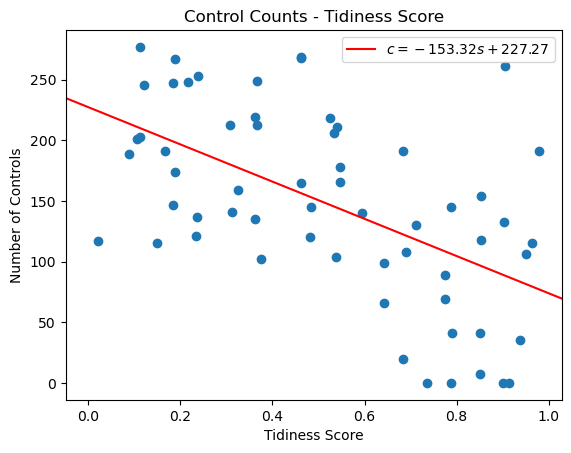

PearsonRResult(statistic=-0.5599119203518008, pvalue=3.297122640972712e-06)


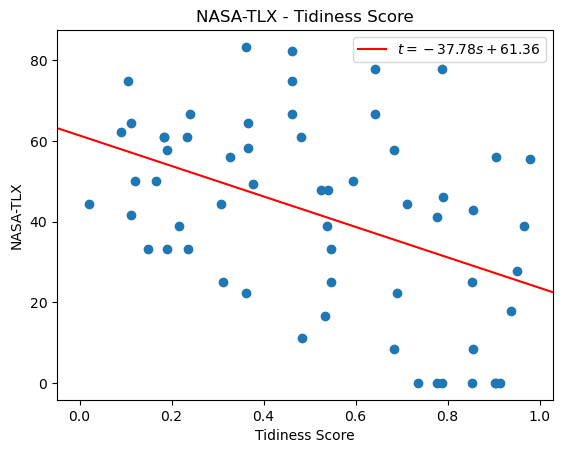

PearsonRResult(statistic=-0.45062224321470457, pvalue=0.00030267277303086526)


In [295]:
xs, ys, rots = calculate_transforms(transforms['Score'])
cts = counts['Score']

distances = (np.array(xs)+np.array(ys))/5  # cm
m, b = np.polyfit(scores, distances, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$d = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, distances)
plt.legend()
plt.title('Distance - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('Total Distance (cm)')
plt.show()
print(scipy.stats.pearsonr(scores, distances))

m, b = np.polyfit(scores, rots, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$r = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, rots)
plt.legend()
plt.title('Rotation - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('Total Rotation (°)')
plt.show()
print(scipy.stats.pearsonr(scores, rots))

m, b = np.polyfit(scores, cts, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$c = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, cts)
plt.legend()
plt.title('Control Counts - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('Number of Controls')
plt.show()
print(scipy.stats.pearsonr(scores, cts))


m, b = np.polyfit(scores, np.mean(nasatlxs['Score'], 1), deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$t = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, np.mean(nasatlxs['Score'], 1))
plt.legend()
plt.title('NASA-TLX - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('NASA-TLX')
plt.show()
print(scipy.stats.pearsonr(scores, np.mean(nasatlxs['Score'], 1)))


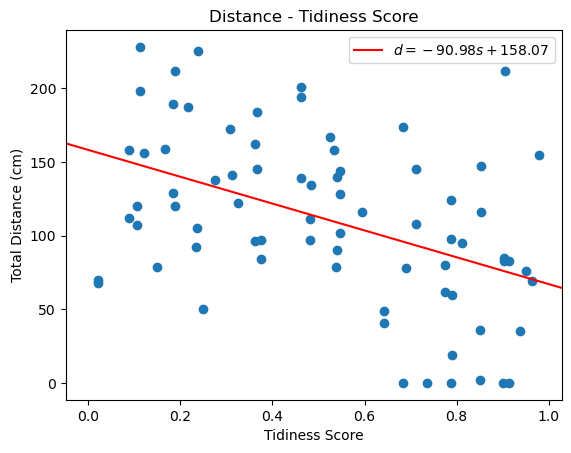

PearsonRResult(statistic=-0.4517647399021387, pvalue=4.7328962041770796e-05)


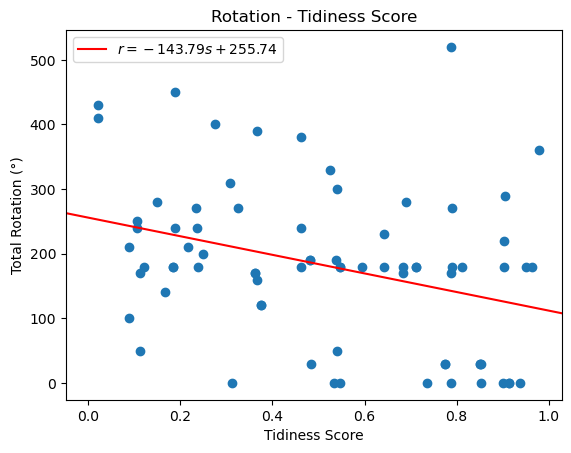

PearsonRResult(statistic=-0.33620681136136127, pvalue=0.0031870533456191783)


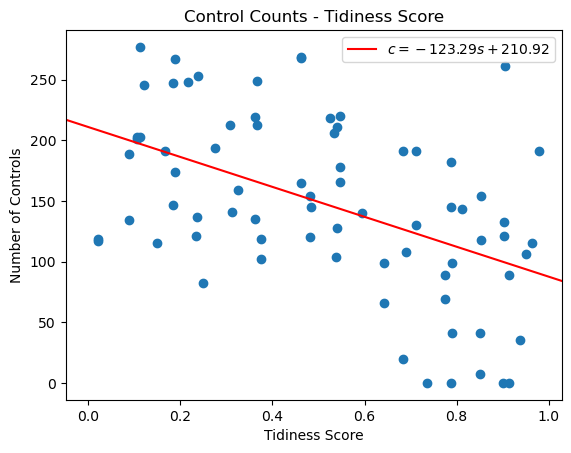

PearsonRResult(statistic=-0.49135964345009886, pvalue=7.594701718967664e-06)


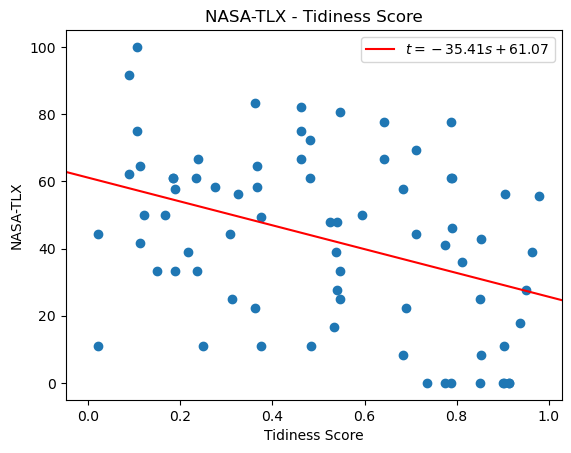

PearsonRResult(statistic=-0.39393272259612466, pvalue=0.00047089512628101926)


In [289]:
xs, ys, rots = calculate_transforms(transforms['Score'])
cts = counts['Score']

distances = (np.array(xs)+np.array(ys))/5  # cm
m, b = np.polyfit(scores, distances, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$d = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, distances)
plt.legend()
plt.title('Distance - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('Total Distance (cm)')
plt.show()
print(scipy.stats.pearsonr(scores, distances))

m, b = np.polyfit(scores, rots, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$r = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, rots)
plt.legend()
plt.title('Rotation - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('Total Rotation (°)')
plt.show()
print(scipy.stats.pearsonr(scores, rots))

m, b = np.polyfit(scores, cts, deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$c = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, cts)
plt.legend()
plt.title('Control Counts - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('Number of Controls')
plt.show()
print(scipy.stats.pearsonr(scores, cts))


m, b = np.polyfit(scores, np.mean(nasatlxs['Score'], 1), deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$t = {m:.2f}s {b:+.2f}$')
plt.scatter(scores, np.mean(nasatlxs['Score'], 1))
plt.legend()
plt.title('NASA-TLX - Tidiness Score')
plt.xlabel('Tidiness Score')
plt.ylabel('NASA-TLX')
plt.show()
print(scipy.stats.pearsonr(scores, np.mean(nasatlxs['Score'], 1)))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


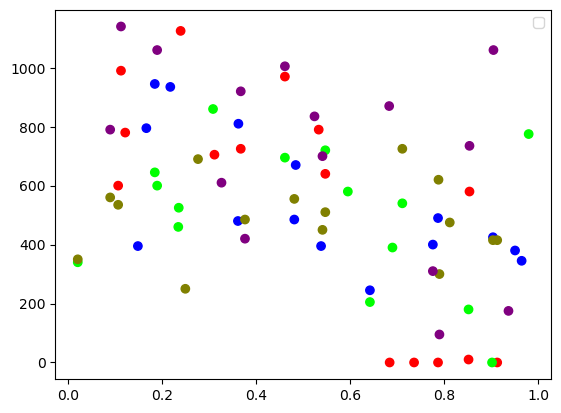

PearsonRResult(statistic=-0.4517647399021388, pvalue=4.7328962041770796e-05)


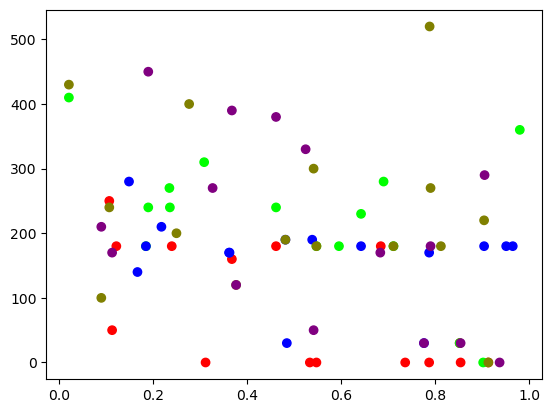

PearsonRResult(statistic=-0.33620681136136127, pvalue=0.0031870533456191783)


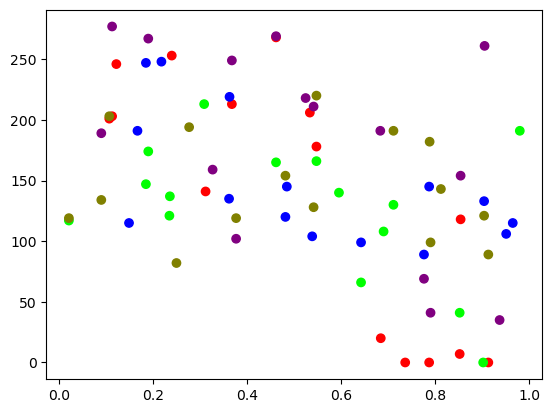

PearsonRResult(statistic=-0.49135964345009886, pvalue=7.594701718967664e-06)


In [173]:
xs, ys, rots = calculate_transforms(transforms['Score'])
cts = counts['Score']
plt.legend()
plt.scatter(scores, np.array(xs)+np.array(ys), c=marker_colors)
plt.show()
# print(np.corrcoef(scores, np.array(xs)+np.array(ys)))
print(scipy.stats.pearsonr(scores, np.array(xs)+np.array(ys)))

plt.scatter(scores, rots, c=marker_colors)
plt.show()
print(scipy.stats.pearsonr(scores, rots))

plt.scatter(scores, cts, c=marker_colors)
plt.show()
print(scipy.stats.pearsonr(scores, cts))


In [29]:
scene_name

'Score68-scene38_img_s736.png'

'736'

In [27]:
line

'Scene 0: SF-scene-16_img.png / [[[5, -100], 10], [[210, -75], 10], [[0, 0], 70], [[230, 70], 0]] / 209\n'

[[[5, -100], 10], [[210, -75], 10], [[0, 0], 70], [[230, 70], 0]]

In [16]:
scene_name, transform, count = x[1].replace(' ', '').split('/')

In [21]:
scene_name.split(':')[1]

'SF-scene-16_img.png'

In [18]:
transform

'[[[5,-100],10],[[210,-75],10],[[0,0],70],[[230,70],0]]'

In [24]:
count[:-1]

'209'